In [1]:
import pandas as pd
from utilities import clean_data, missing
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
sns.set_style("whitegrid")  # Base style

In [2]:
df, df_brands, df_allbrands, brands, compsets, compset_groups, groups_bycompset = clean_data()

In [3]:
df_missing = missing(df)

In [4]:
brands_by_cgroup = {} # dict: list of brands contained in each compset_group
for group in compset_groups:
    brands_by_cgroup[group] = df_brands[df_brands['compset_group'] == group][
        'business_entity_doing_business_as_name'].tolist()

In [5]:
df_brands

business_entity_doing_business_as_name                  compset_group  \
0                                      24S                 Apparel Retail   
1                          3.1 Phillip Lim  Luxury & Premium & Mainstream   
2                                      3CE              Beauty & Boutique   
3                        A. Lange & Soehne  Luxury & Premium & Mainstream   
4                                  ANIMALE                 Apparel Retail   
..                                     ...                            ...   
700                           bareMinerals              Beauty & Boutique   
701                         dd's Discounts                 Apparel Retail   
702                                 e.l.f.              Beauty & Boutique   
703                                 iRobot                Home Appliances   
704                             shopDisney            Toys & Collectibles   

                                               compset  \
0    [Apparel Retail, Ecommerce Apparel Retail, Eco...   
1    [Luxury & Premium & Mainstream, Soft Luxury, U...   
2                                  [Beauty & Boutique]   
3         [Hard Luxury, Luxury & Premium & Mainstream]   
4                                     [Apparel Retail]   
..                                                 ...   
700                                [Beauty & Boutique]   
701  [Apparel Retail, US Discount Store, US Softlin...   
702                                [Beauty & Boutique]   
703                                  [Home Appliances]   
704                              [Toys & Collectibles]   

                       legal_entity_name     domicile_country_name  \
0    LVMH Moet Hennessy Louis Vuitton SE                    France   
1                     Alexander Wang Inc                      None   
2                                L'Oreal                    France   
3                              Richemont               Switzerland   
4                  GRUPO DE MODA SOMA SA                    Brazil   
..                                   ...                       ...   
700                             Shiseido                     Japan   
701                          Ross Stores  United States of America   
702                       elf Beauty Inc  United States of America   
703                          iRobot Corp  United States of America   
704                               Disney  United States of America   

       ultimate_parent_legal_entity_name                 primary_exchange_name  
0    LVMH Moet Hennessy Louis Vuitton SE                        Euronext Paris  
1                     Alexander Wang Inc                                  None  
2                                L'Oreal                        Euronext Paris  
3                              Richemont                    Six Swiss Exchange  
4                  GRUPO DE MODA SOMA SA  Bolsa de Valores de Sao Paulo (XBSP)  
..                                   ...                                   ...  
700                             Shiseido                  Tokyo Stock Exchange  
701                          Ross Stores                  NASDAQ Global Select  
702                       elf Beauty Inc               New York Stock Exchange  
703                          iRobot Corp                  NASDAQ - All Markets  
704                               Disney               New York Stock Exchange  

[705 rows x 7 columns]

In [6]:
df

period_end_date business_entity_doing_business_as_name  followers  \
0           2017-05-06                                    24S        NaN   
1           2017-05-13                                    24S        NaN   
2           2017-05-20                                    24S        NaN   
3           2017-05-27                                    24S        NaN   
4           2017-06-03                                    24S        NaN   
...                ...                                    ...        ...   
298035      2023-08-19                             shopDisney  4221812.0   
298036      2023-08-26                             shopDisney  4224473.0   
298037      2023-09-02                             shopDisney  4228605.0   
298038      2023-09-09                             shopDisney  4233764.0   
298039      2023-09-16                             shopDisney  4239207.0   

        pictures  videos  comments     likes  
0            NaN     NaN       NaN       NaN  
1            6.0     3.0      57.0    1765.0  
2            6.0     3.0      57.0    1765.0  
3            6.0     3.0      57.0    1765.0  
4           24.0     3.0     109.0    3922.0  
...          ...     ...       ...       ...  
298035     266.0    52.0    3099.0  266166.0  
298036     265.0    61.0    3494.0  316126.0  
298037     268.0    61.0    3920.0  341795.0  
298038     259.0    56.0    3700.0  335231.0  
298039     244.0    72.0    3908.0  330793.0  

[298040 rows x 7 columns]

In [23]:
brands_by_cgroup

{'Luxury & Premium & Mainstream': ['3.1 Phillip Lim',
  'A. Lange & Soehne',
  'Acne Studios',
  'Alexander McQueen',
  'Alexander Wang',
  'Alice & Olivia',
  'AllSaints',
  'Allbirds',
  'Armani',
  'Audemars Piguet',
  'Balenciaga',
  'Balmain',
  'Bell & Ross',
  'Blancpain',
  'Boss',
  'Bottega Veneta',
  'Breguet',
  'Breitling',
  'Brooks Brothers',
  'Brunello Cucinelli',
  'Bulgari',
  'Burberry',
  'Calvin Klein',
  'Canada Goose',
  'Carolina Herrera',
  'Cartier',
  'Casio Watch',
  'Celine',
  'Certina',
  'Chanel',
  'Chaumet',
  'Chloe',
  'Chopard',
  'Christian Louboutin',
  'Citizen',
  'Claudie Pierlot',
  'Coach',
  'Cole Haan',
  'DKNY',
  'Daniel Wellington',
  'Diane Von Furstenberg',
  'Dior',
  'Dockers',
  'Dolce & Gabbana',
  'Donna Karan',
  'Dr. Martens',
  'Dsquared2',
  'Eddie Bauer',
  'Fendi',
  'Ferragamo',
  'Givenchy',
  'Glashutte Original',
  'Gucci',
  'Hamilton Watch',
  'Harry Winston',
  'Hermes',
  'Hublot',
  'Hugo',
  'IWC Schaffhausen',
  

In [29]:
cgroup_ranking = {cgroup: df[df['business_entity_doing_business_as_name'].isin(brands_by_cgroup[cgroup])].dropna(subset=['followers']).copy() for cgroup in compset_groups}

In [30]:
for cgroup in compset_groups:
    cgroup_ranking[cgroup]['FRanking']=np.nan
    for date, data in cgroup_ranking[cgroup].groupby('period_end_date'):
        cgroup_ranking[cgroup].loc[data.index, 'FRanking'] = data['followers'].rank(ascending=False, method='dense').astype(int)

In [31]:
for cgroup in compset_groups:
    grouped = cgroup_ranking[cgroup].groupby('business_entity_doing_business_as_name')
    cgroup_ranking[cgroup]['diff_FRanking'] = grouped['FRanking'].diff()

In [38]:
for cgroup in compset_groups:
    cgroup_ranking[cgroup]['diff_FRanking_blur'] = cgroup_ranking[cgroup]['diff_FRanking'].rolling(window=10, center=True).mean()

In [39]:
cgroup_ranking['Entertainment']

period_end_date business_entity_doing_business_as_name   followers  \
79149       2018-07-07                                 Disney  12764999.0   
79150       2018-07-14                                 Disney  12831812.0   
79151       2018-07-21                                 Disney  12904865.0   
79152       2018-07-28                                 Disney  12978226.0   
79153       2018-08-04                                 Disney  13044627.0   
...                ...                                    ...         ...   
248749      2023-08-19                               Starwars  16795885.0   
248750      2023-08-26                               Starwars  16826669.0   
248751      2023-09-02                               Starwars  16851262.0   
248752      2023-09-09                               Starwars  16876413.0   
248753      2023-09-16                               Starwars  16906122.0   

        pictures  videos  comments      likes  FRanking  diff_FRanking  \
79149      196.0   140.0   52688.0  6301921.0       1.0            NaN   
79150      199.0   129.0   43158.0  5032602.0       1.0            0.0   
79151      183.0   119.0   35461.0  3668872.0       1.0            0.0   
79152      182.0   125.0   30929.0  3265694.0       1.0            0.0   
79153      200.0   126.0   40107.0  4490637.0       1.0            0.0   
...          ...     ...       ...        ...       ...            ...   
248749      16.0    38.0   29362.0  5870117.0       3.0            0.0   
248750      20.0    47.0   39883.0  7291661.0       3.0            0.0   
248751      24.0    48.0   41508.0  7265268.0       3.0            0.0   
248752      28.0    48.0   46201.0  7463306.0       3.0            0.0   
248753      29.0    39.0   51249.0  7213910.0       3.0            0.0   

        diff_FRanking_blur  
79149                  NaN  
79150                  NaN  
79151                  NaN  
79152                  NaN  
79153                  NaN  
...                    ...  
248749                 0.0  
248750                 NaN  
248751                 NaN  
248752                 NaN  
248753                 NaN  

[756 rows x 10 columns]

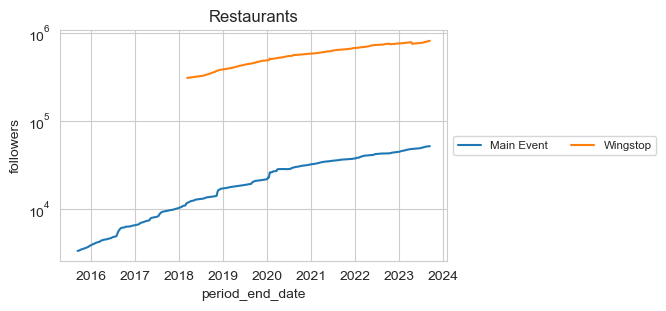

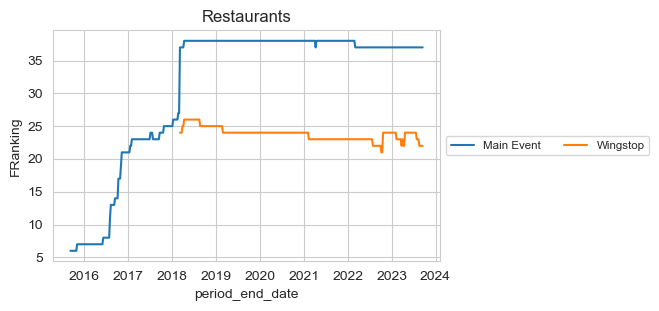

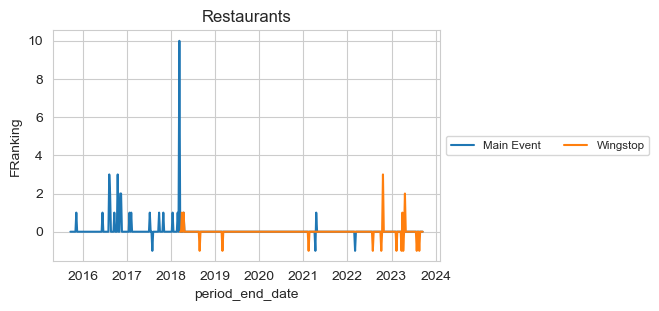

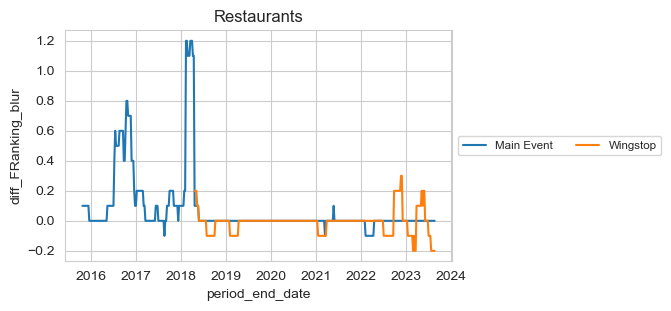

In [40]:

#for cgroup in ['Restaurants']:
for cgroup in compset_groups:
    #dff=cgroup_ranking[cgroup][cgroup_ranking[cgroup]['business_entity_doing_business_as_name'].isin(['Main Event', 'Wingstop'])]
    dff=cgroup_ranking[cgroup]
    plt.figure(figsize=(5,3))
    for brand, data in dff.groupby('business_entity_doing_business_as_name'):
        plt.semilogy(data['period_end_date'], data['followers'], label=brand)
    plt.xlabel('period_end_date')
    plt.ylabel('followers')
    plt.title(cgroup)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=math.ceil(len(brands_by_cgroup[cgroup])/30))
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(5,3))
    for brand, data in dff.groupby('business_entity_doing_business_as_name'):
        plt.plot(data['period_end_date'], data['FRanking'], label=brand)
    plt.xlabel('period_end_date')
    plt.ylabel('FRanking')
    plt.title(cgroup)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=math.ceil(len(brands_by_cgroup[cgroup])/30))
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(5,3))
    for brand, data in dff.groupby('business_entity_doing_business_as_name'):
        plt.plot(data['period_end_date'], data['diff_FRanking'], label=brand)
    plt.xlabel('period_end_date')
    plt.ylabel('FRanking')
    plt.title(cgroup)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=math.ceil(len(brands_by_cgroup[cgroup])/30))
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(5,3))
    for brand, data in dff.groupby('business_entity_doing_business_as_name'):
        plt.plot(data['period_end_date'], data['diff_FRanking_blur'], label=brand)
    plt.xlabel('period_end_date')
    plt.ylabel('diff_FRanking_blur')
    plt.title(cgroup)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=math.ceil(len(brands_by_cgroup[cgroup])/30))
    plt.grid(True)
    plt.show()

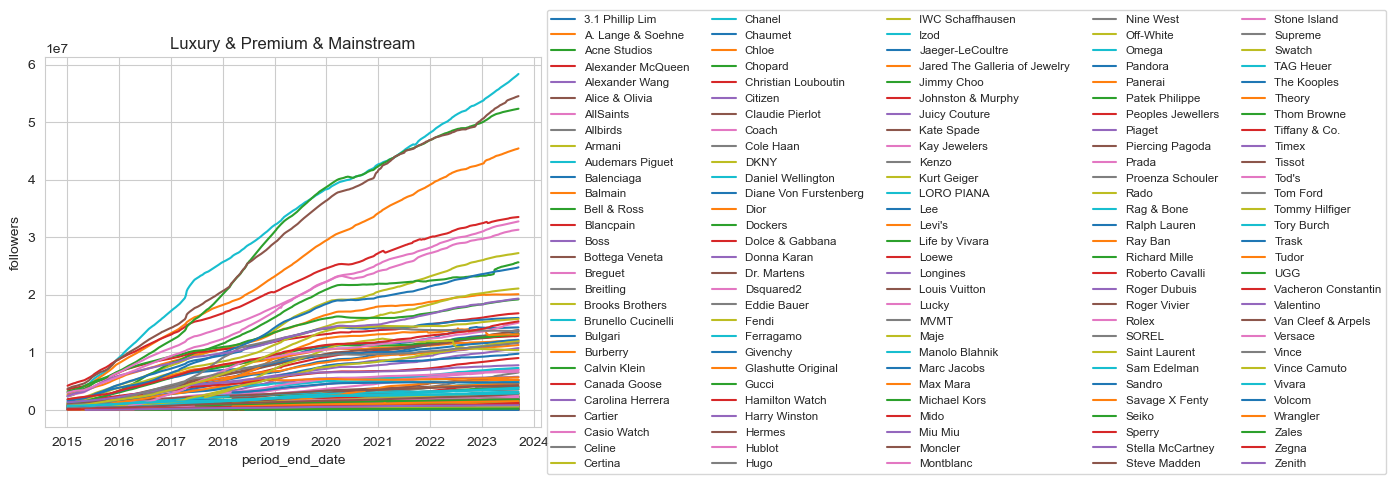

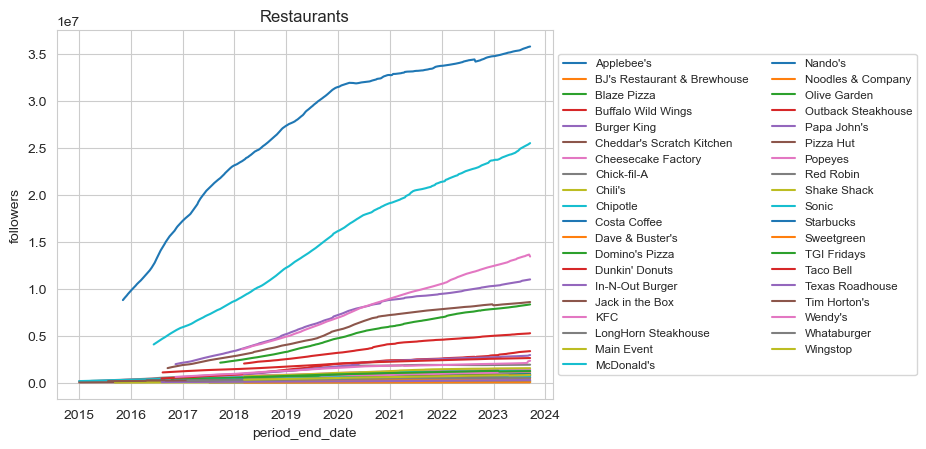

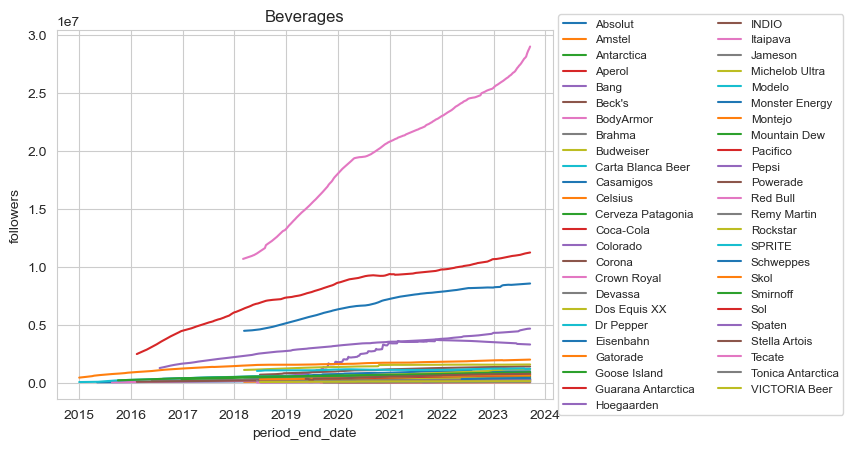

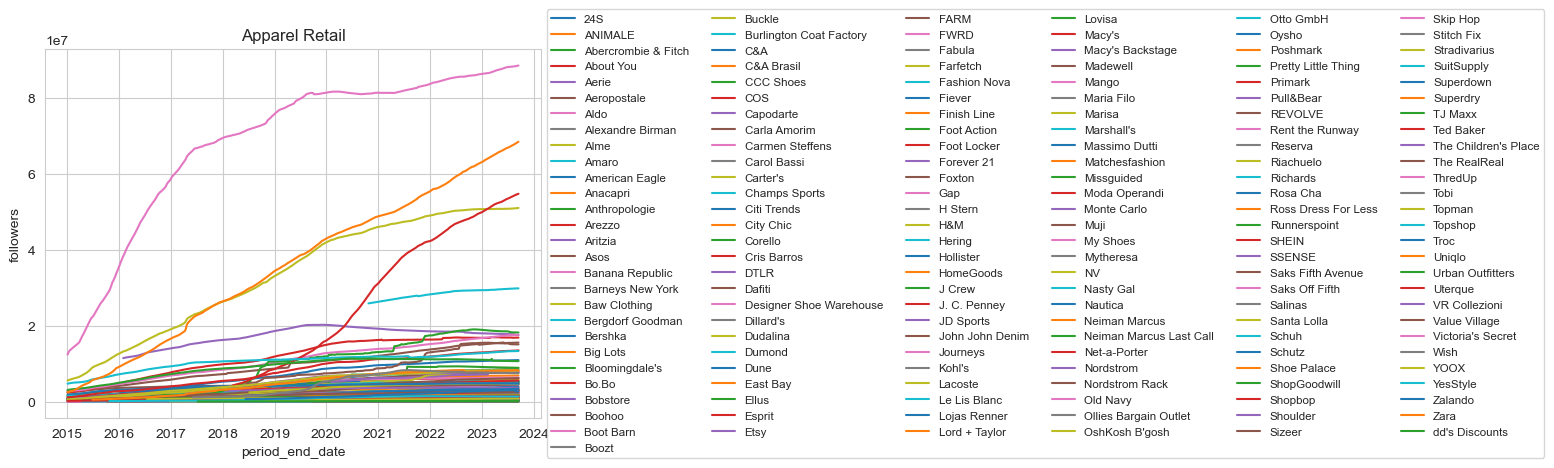

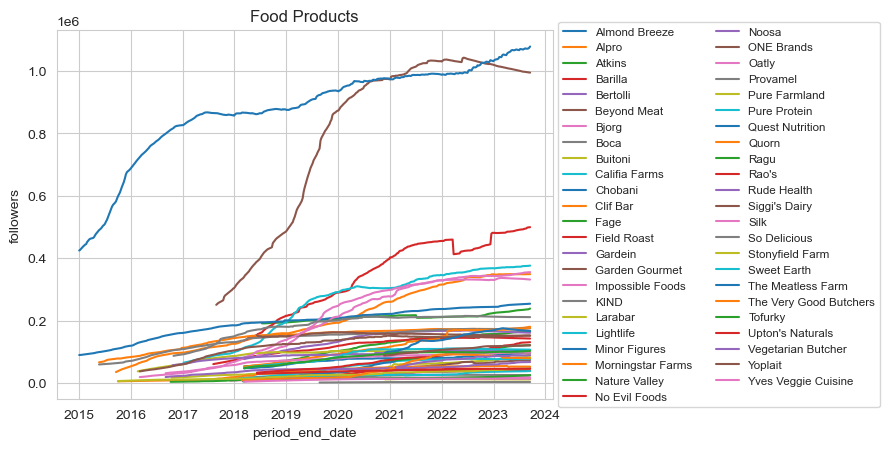

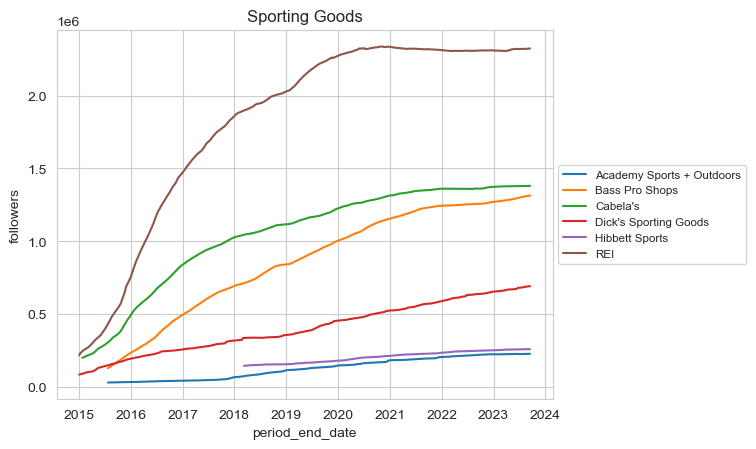

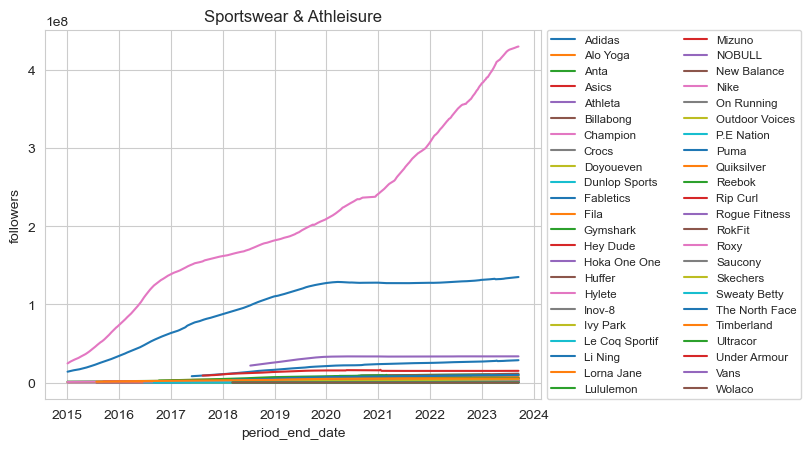

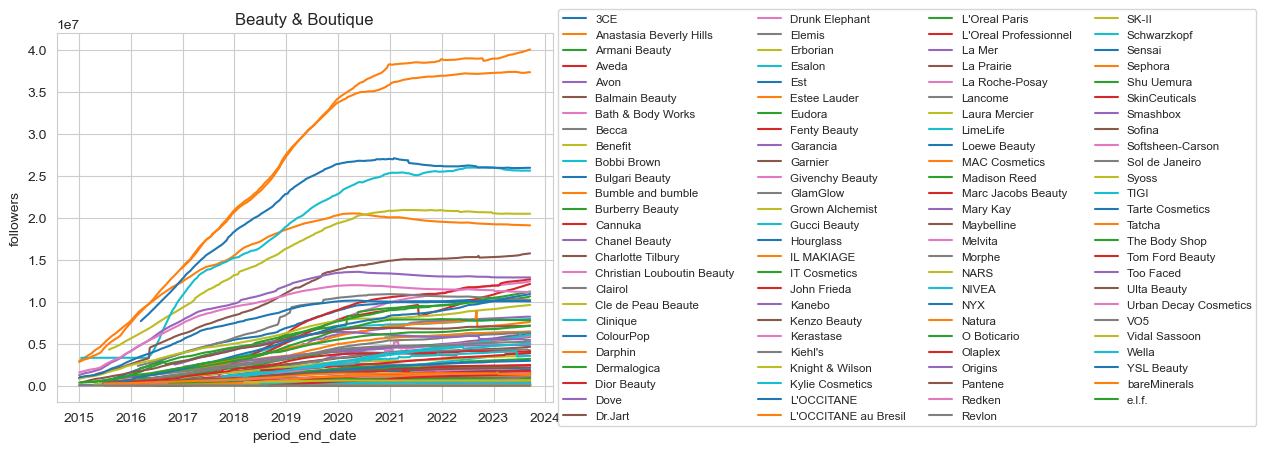

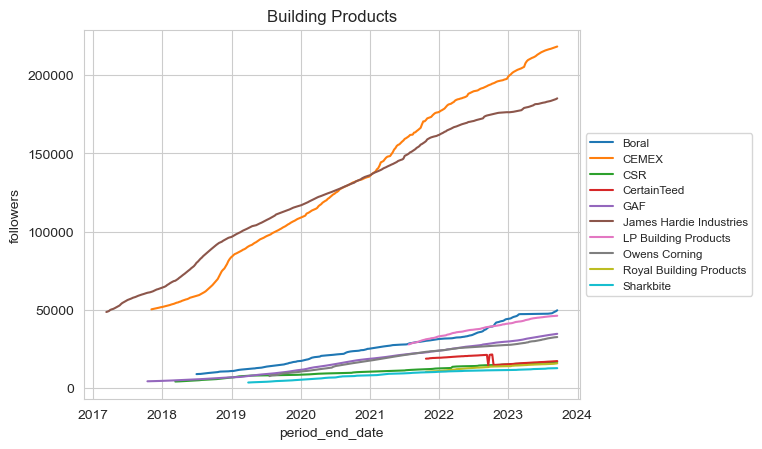

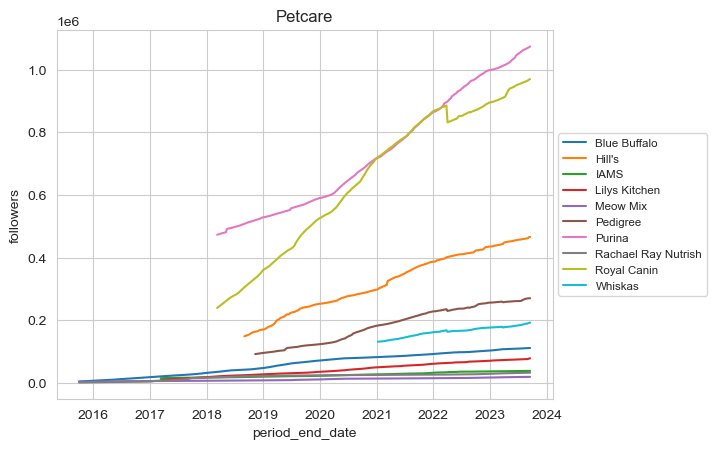

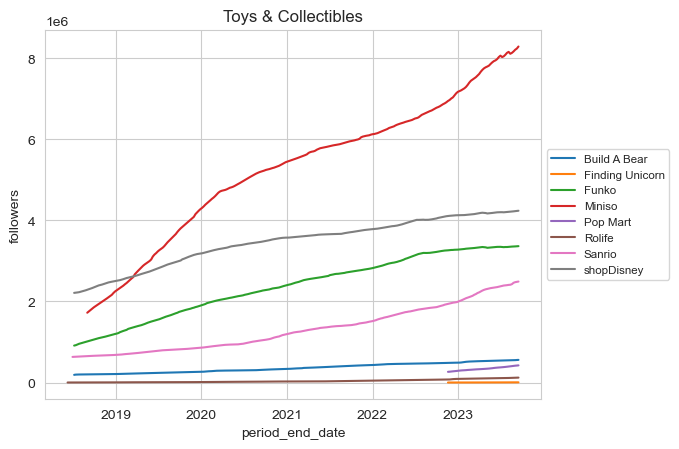

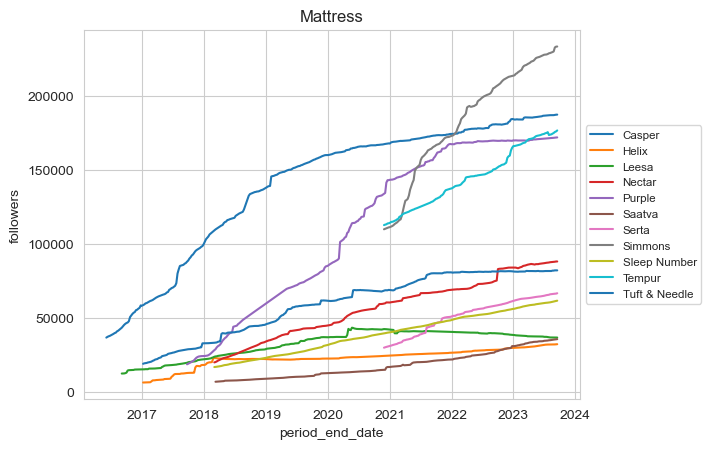

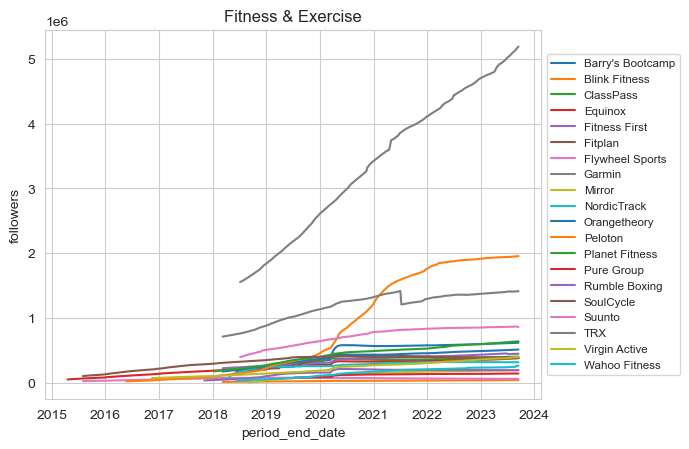

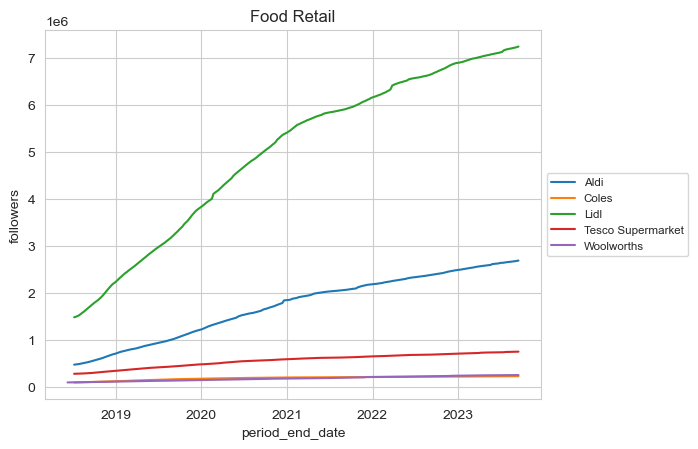

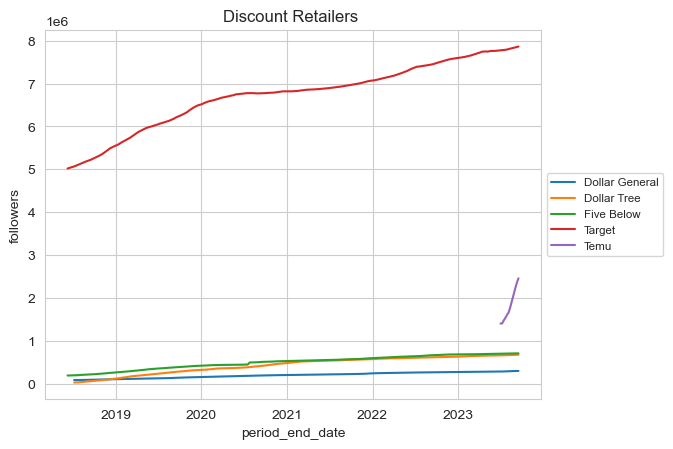

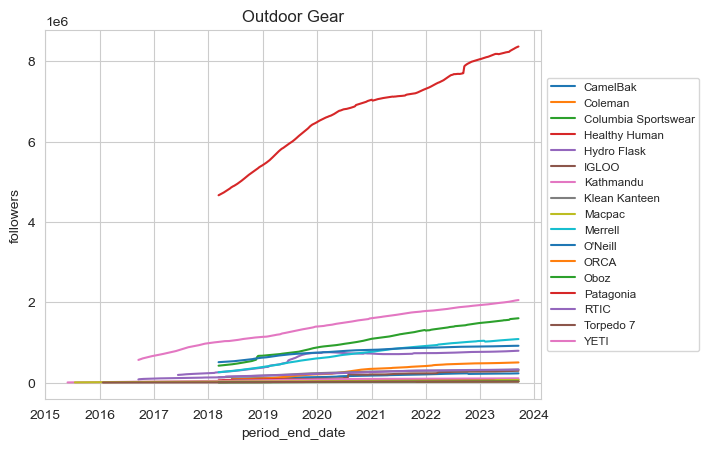

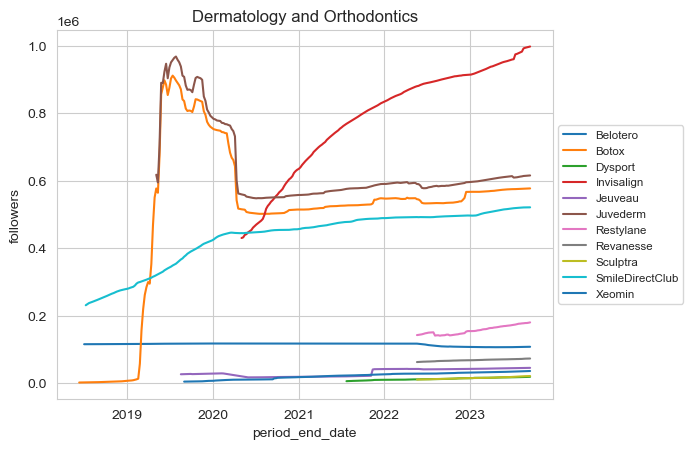

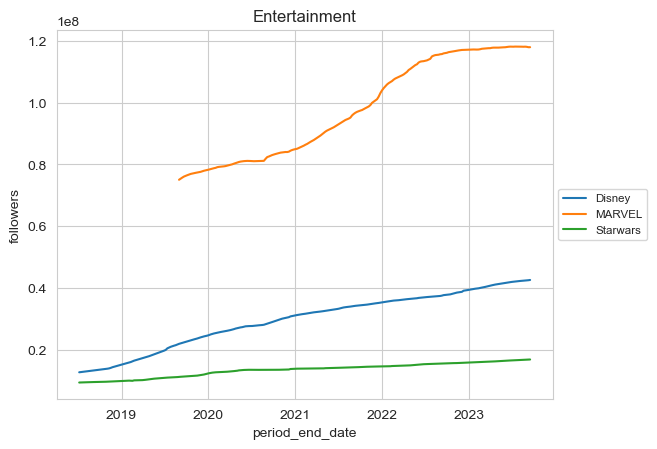

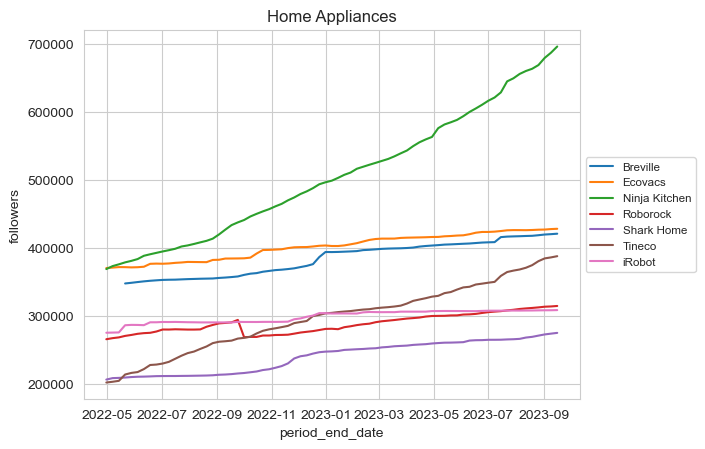

In [41]:
for cgroup in compset_groups:
    plt.figure()
    for brand, data in cgroup_ranking[cgroup].groupby('business_entity_doing_business_as_name'):
        plt.plot(data['period_end_date'], data['followers'], label=brand)
    plt.xlabel('period_end_date')
    plt.ylabel('followers')
    plt.title(cgroup)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=math.ceil(len(brands_by_cgroup[cgroup])/30))
    plt.grid(True)
    plt.show()

In [ ]:
def rank_brands(group):
    group['followers'] = group['followers'].fillna(-1)
    group['Ranking'] = group['followers'].rank(ascending=False, method='dense').astype(int)
    return group

# cgroup_ranking['Entertainment'] = cgroup_ranking['Entertainment'].groupby('period_end_date').apply(rank_brands)
# 
# cgroup_ranking['Entertainment'].reset_index(drop=True, inplace=True)


grouped_df = cgroup_ranking['Entertainment'].groupby(['period_end_date', 'business_entity_doing_business_as_name'], as_index=False)

# Apply the function to each group of 'period_end_date' and 'brand'
grouped_df_ranked = grouped_df.apply(rank_brands)

# Reset the index to avoid keeping the groupby index
df_with_ranking = grouped_df_ranked.reset_index(drop=True)